In [1]:
from qa_qc_lib.qa_qc_seismic import QA_QC_seismic

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length):
    if num_sides < 3:
        raise ValueError("A polygon must have at least 3 sides.")

    side_lengths = np.random.uniform(min_side_length, max_side_length, num_sides)
    total_perimeter = np.sum(side_lengths)
    angles = np.random.uniform(0, 360, num_sides)
    cumulative_angles = np.cumsum(angles)
    x_coords = total_perimeter * np.cos(np.radians(cumulative_angles))
    y_coords = total_perimeter * np.sin(np.radians(cumulative_angles))
    x_coords = np.append(x_coords, x_coords[0])
    y_coords = np.append(y_coords, y_coords[0])

    for i in range(num_sides):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % num_sides], y_coords[(i + 1) % num_sides]
        for j in range(i + 2, num_sides):
            x3, y3 = x_coords[j], y_coords[j]
            x4, y4 = x_coords[(j + 1) % num_sides], y_coords[(j + 1) % num_sides]
            if do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
                return generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

    return x_coords, y_coords

def do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    def cross_product(x1, y1, x2, y2):
        return x1 * y2 - x2 * y1

    d1 = cross_product(x4 - x3, y4 - y3, x1 - x3, y1 - y3)
    d2 = cross_product(x4 - x3, y4 - y3, x2 - x3, y2 - y3)
    d3 = cross_product(x2 - x1, y2 - y1, x3 - x1, y3 - y1)
    d4 = cross_product(x2 - x1, y2 - y1, x4 - x1, y4 - y1)

    if (d1 * d2 < 0) and (d3 * d4 < 0):
        return True
    return False


def add_noise_to_polygon(polygon_points, noise_factor=0.1):
    x_coords, y_coords = zip(*polygon_points)
    noise_x = np.random.uniform(-noise_factor, noise_factor, len(x_coords))
    noise_y = np.random.uniform(-noise_factor, noise_factor, len(y_coords))

    x_coords_noisy = [x + noise for x, noise in zip(x_coords, noise_x)]
    y_coords_noisy = [y + noise for y, noise in zip(y_coords, noise_y)]

    return list(zip(x_coords_noisy, y_coords_noisy))
    

def build_polygon_from_points(x_coords, y_coords):
    min_x, max_x = min(x_coords), max(x_coords)
    min_y, max_y = min(y_coords), max(y_coords)

    rectangle_points = [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]
    return rectangle_points

In [3]:
num_sides = 5
min_side_length = 1
max_side_length = 5
x_coords, y_coords = generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

license_area_poly = list(zip(x_coords*5000, y_coords*500))
license_area_poly

[(24116.3837322919, 5802.802651317173),
 (-61359.90580269942, 1355.779426088064),
 (-62559.668937391274, -592.7870425415495),
 (-59974.42688509671, -1875.95294488082),
 (-23915.57411658522, -5811.107588068416),
 (24116.3837322919, 5802.802651317173)]

In [4]:
file_path = 'data/seismic_data/Глубинный куб NP cropped'
surfaces_path_list = ['data/seismic_data/TWT_NP4', 'data/seismic_data/TWT_NP5', 'data/seismic_data/NP4_TVD_TOP', 'data/seismic_data/NP4_TWT_TOP']

seism_data_qa_qc = QA_QC_seismic(file_path=file_path,
                                 surfaces_path_list=surfaces_path_list,
                                 faults_file_path='data/seismic_data/Faults TVD'
                                 )
                                 

In [5]:
seism_data_qa_qc.license_area_poly = add_noise_to_polygon(build_polygon_from_points(seism_data_qa_qc.coordinate_x, seism_data_qa_qc.coordinate_y), noise_factor=10000)
#seism_data_qa_qc.license_area_poly = None
#seism_data_qa_qc.license_area_poly = license_area_poly

In [6]:
test_names = seism_data_qa_qc.get_list_of_tests()
test_names

['test_coordinate_validation',
 'test_edge_zone_evaluation',
 'test_faults_location_validation',
 'test_miss_traces',
 'test_monotony',
 'test_surfaces_dept_validation',
 'test_surfaces_location_validation',
 'test_surfaces_values_validation']

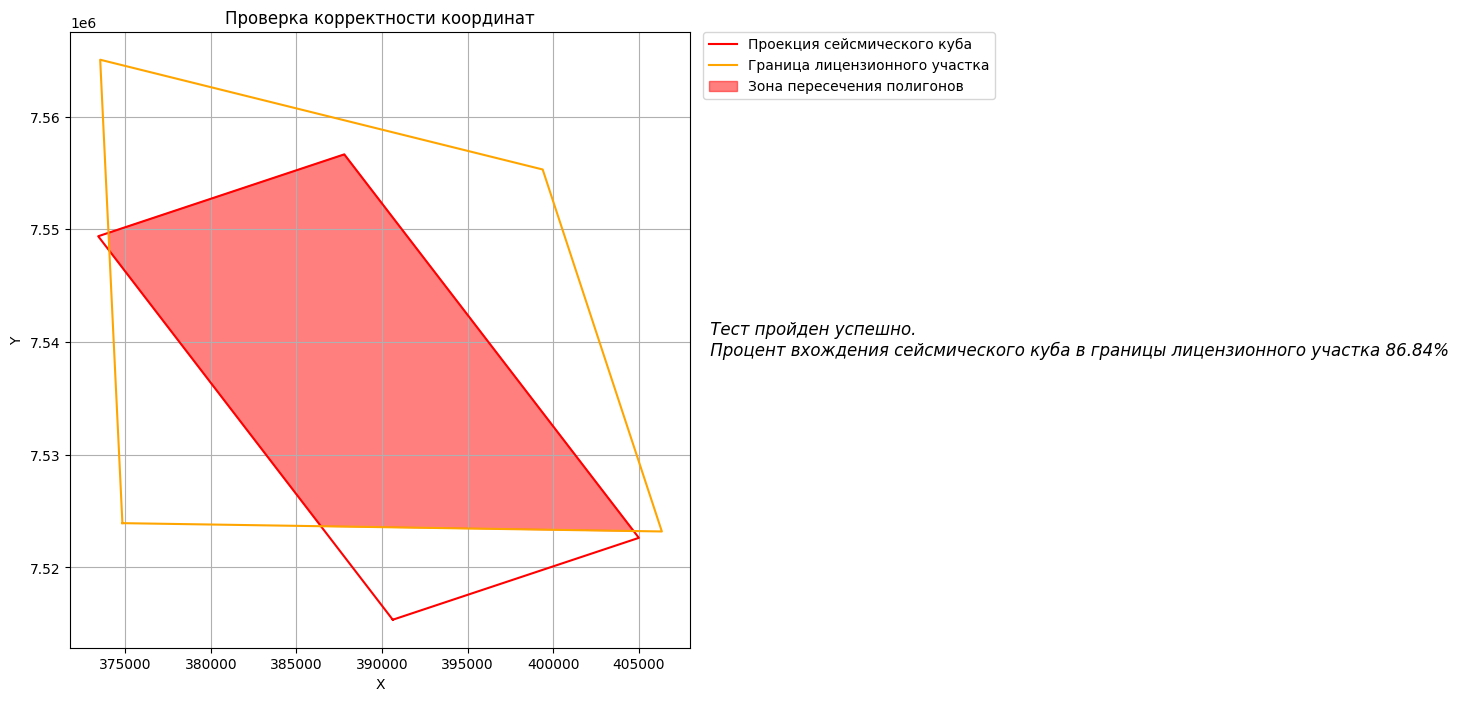


------------------------------------------------------------------------------------


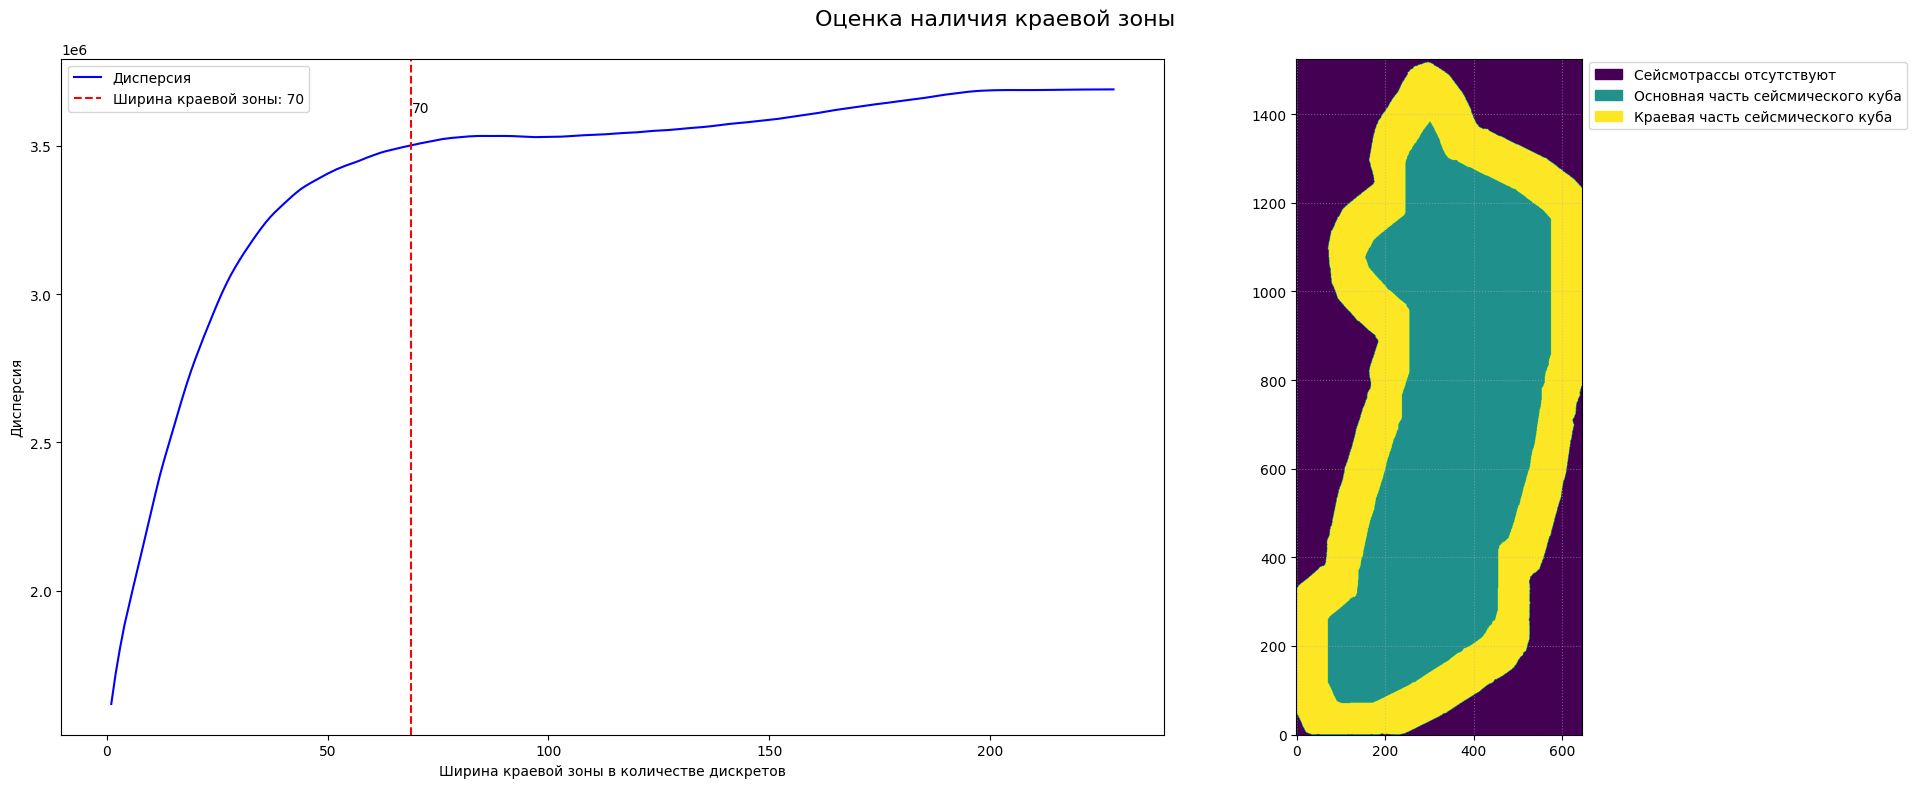


------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_2_[Depth_1]"; 52.63% точек разлома из 19 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_4_[Depth_1]"; 75.0% точек разлома из 20 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_5_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_6_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешн

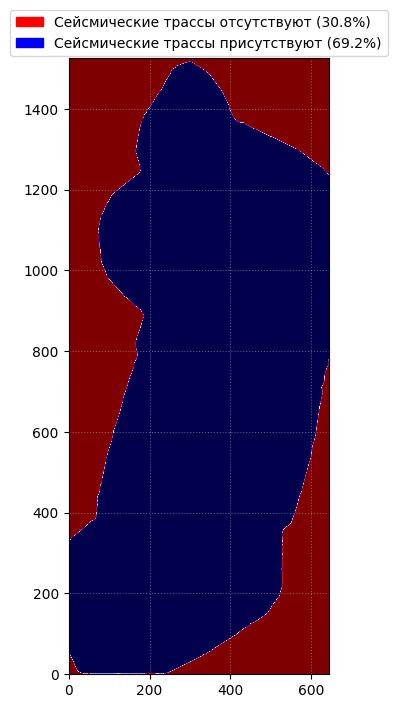


------------------------------------------------------------------------------------

     Тест пройден успешно.
     Отметки оси глубин/времени монотонно возрастают
------------------------------------------------------------------------------------

     Тест не пройден.
     Нижележащая структурная карта "TWT_NP5" оказалась выше вышележащей структурной карты "TWT_NP4" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Нижележащая структурная карта "NP4_TVD_TOP" оказалась ниже вышележащей структурной карты "TWT_NP5"
------------------------------------------------------------------------------------

     Тест не пройден.
     Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------

     Тест не пройден.
     Путь к 

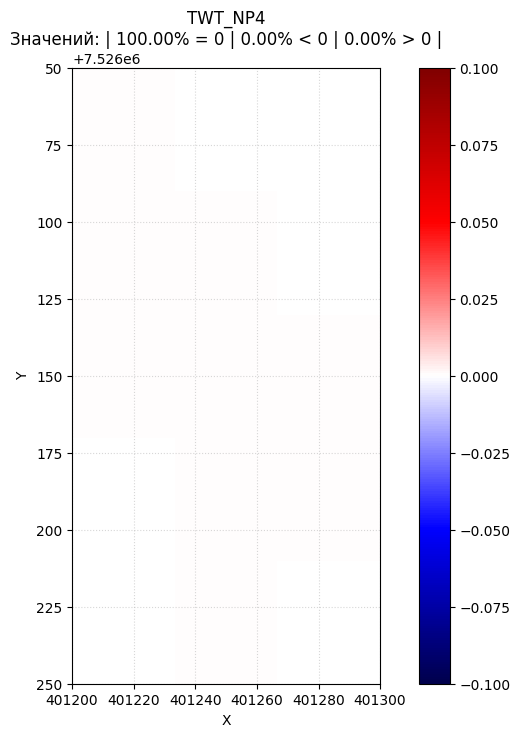


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!


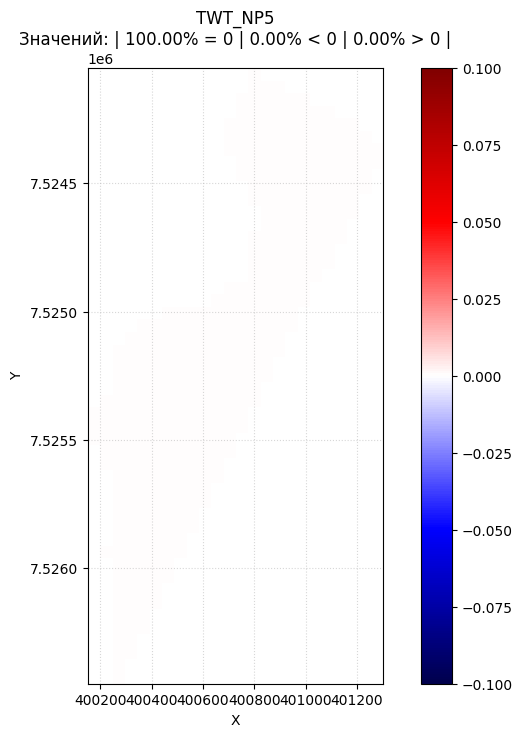


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TVD_TOP";отражающий горизонт NP4_TVD_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TWT_TOP";отражающий горизонт NP4_TWT_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------


In [7]:
result = seism_data_qa_qc.start_tests(test_names)

Оценивает вхождение сейсмического куба в полигон лицензионного участка

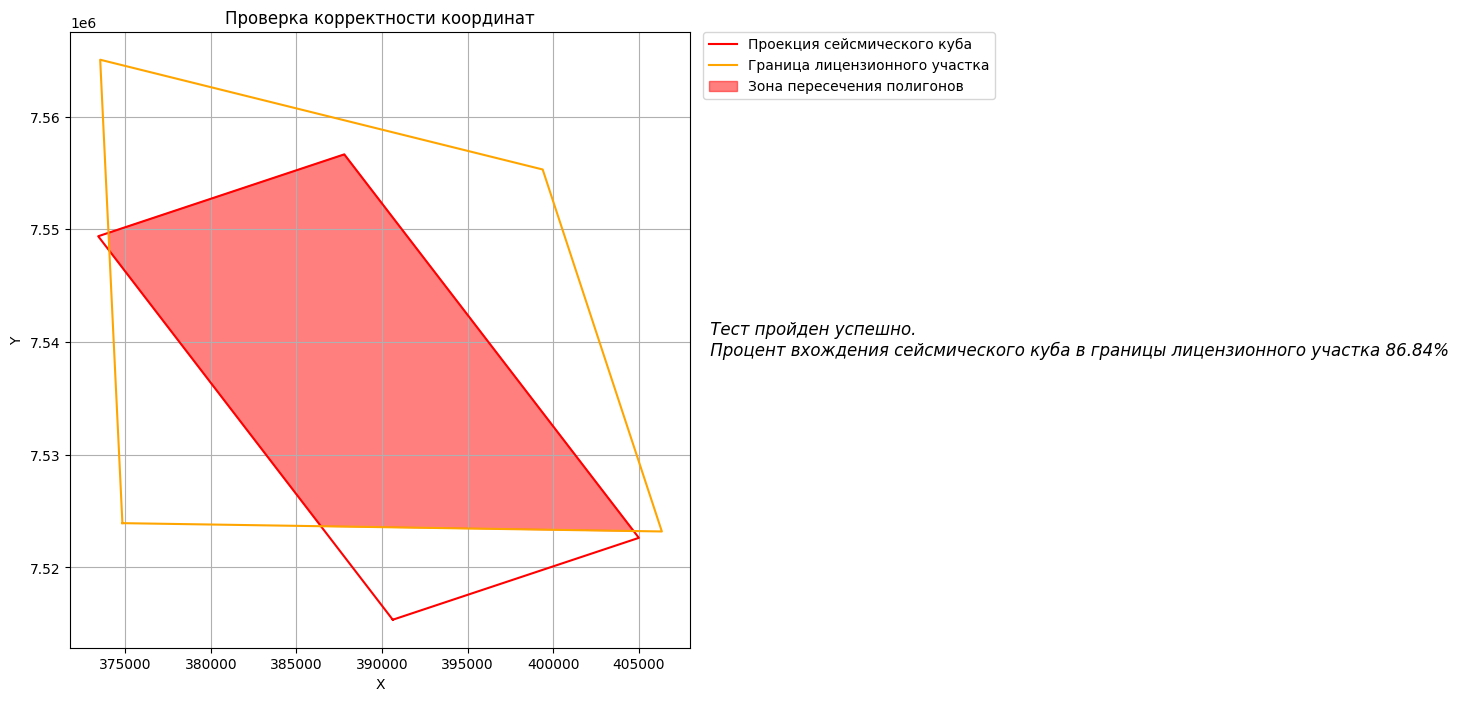


------------------------------------------------------------------------------------


{'result': 'True', 'file_name': 'Глубинный куб NP cropped'}

In [8]:
seism_data_qa_qc.test_coordinate_validation()

Выявление границы краевой зоны

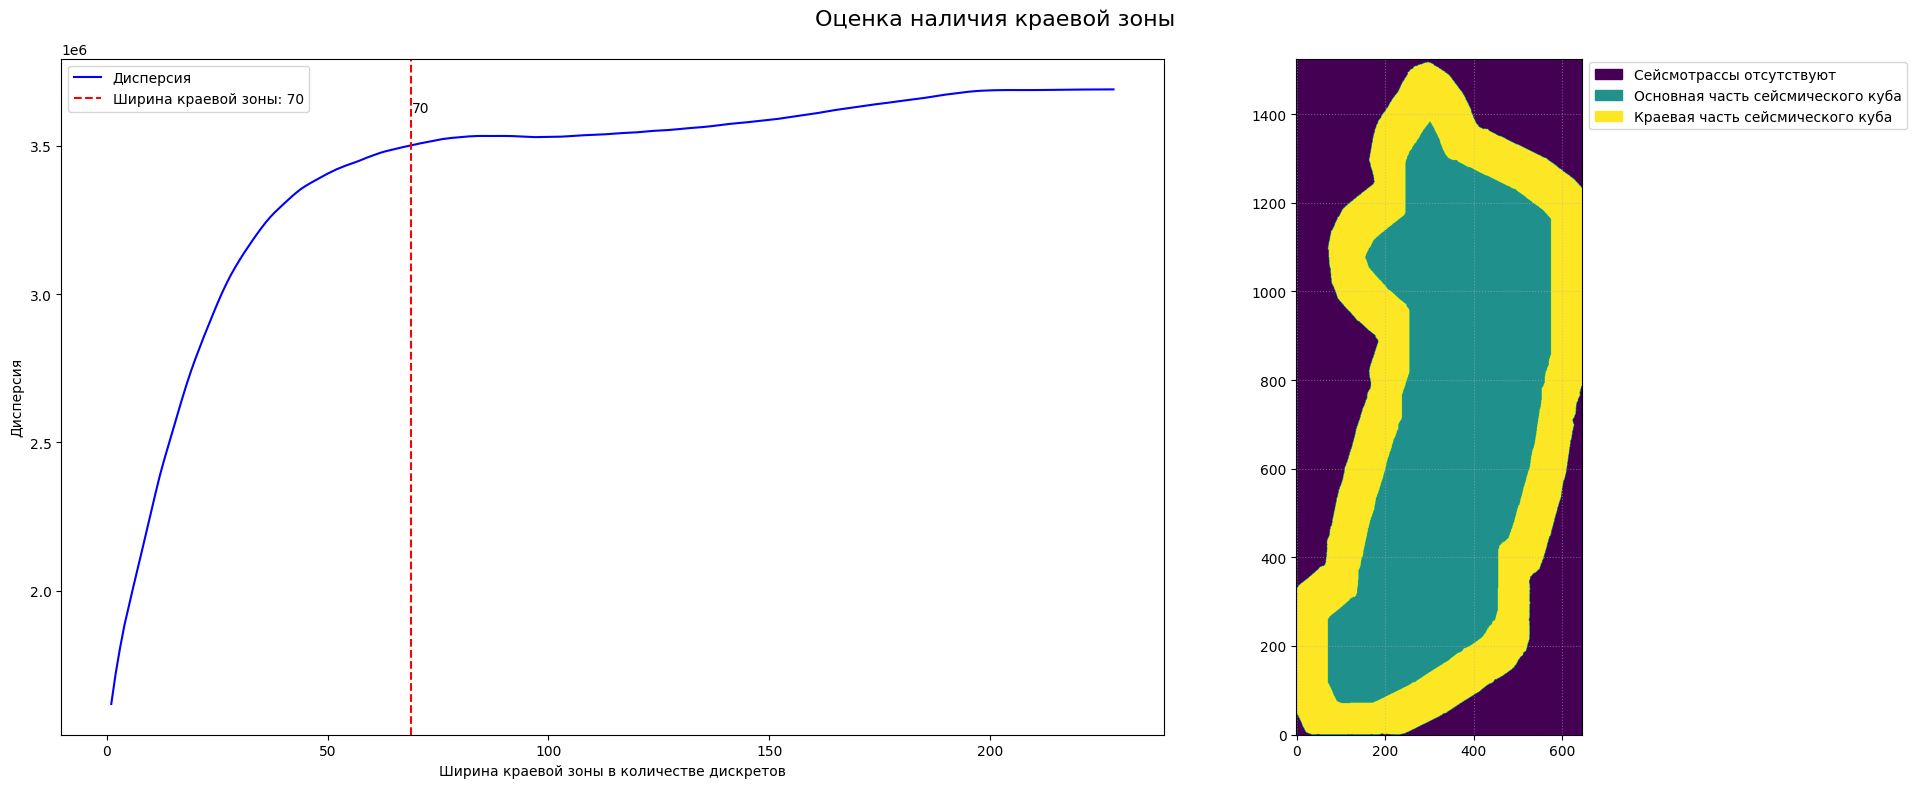


------------------------------------------------------------------------------------


{'variance_list': [1617508.8,
  1720421.2,
  1807432.1,
  1884600.1,
  1949360.9,
  2013024.6,
  2075065.0,
  2137319.0,
  2200857.5,
  2263626.0,
  2326916.2,
  2387554.8,
  2441871.5,
  2492998.5,
  2543889.5,
  2593957.8,
  2644352.8,
  2692625.2,
  2737771.0,
  2779641.8,
  2818822.2,
  2857315.0,
  2894489.5,
  2930707.8,
  2966736.2,
  3001044.5,
  3032519.0,
  3062020.8,
  3088483.8,
  3113355.0,
  3137023.2,
  3159292.5,
  3181224.5,
  3202388.2,
  3222622.2,
  3241996.2,
  3259375.0,
  3275214.0,
  3289502.0,
  3303326.2,
  3317161.2,
  3330515.2,
  3343180.2,
  3354841.5,
  3364484.0,
  3373465.5,
  3381891.5,
  3389975.2,
  3398146.0,
  3406189.0,
  3413599.2,
  3420620.2,
  3426761.5,
  3432685.0,
  3438011.8,
  3442996.2,
  3448651.8,
  3454779.0,
  3460760.8,
  3466361.5,
  3471572.0,
  3476695.8,
  3481099.0,
  3484738.8,
  3488339.0,
  3491964.5,
  3495380.0,
  3498711.5,
  3501796.5,
  3505108.2,
  3508322.5,
  3511262.0,
  3514303.2,
  3517157.5,
  3519985.0,
  352271

In [9]:
seism_data_qa_qc.test_edge_zone_evaluation()

Проверка положения плоскости разлома на глубинном сейсмическом кубе

In [10]:
seism_data_qa_qc.test_faults_location_validation()


     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_2_[Depth_1]"; 52.63% точек разлома из 19 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_4_[Depth_1]"; 75.0% точек разлома из 20 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_5_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_6_[Depth_1]"; 50.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Разлом:"Fault_Ok_Jra_kust14_7_[Depth_1]"; 54.55% точек разлома из 11 входит в 

{'data availability': True,
 'Fault_Ok_Jra_kust14_2_[Depth_1]': {'income_points_percent': 52.63},
 'Fault_Ok_Jra_kust14_4_[Depth_1]': {'income_points_percent': 75.0},
 'Fault_Ok_Jra_kust14_5_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_Jra_kust14_6_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_Jra_kust14_7_[Depth_1]': {'income_points_percent': 54.55},
 'Fault_Ok_Jra_kust14_8_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_Jra_kust14_9_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_10_[Depth_1]': {'income_points_percent': 55.0},
 'Fault_Ok_NP_Jra_kust11_11_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_14_[Depth_1]': {'income_points_percent': 68.75},
 'Fault_Ok_NP_Jra_kust11_15_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_1_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_2_[Depth_1]': {'income_points_percent': 72.73},
 'Fault_Ok_NP_Jra_kust11_3_[Depth_1]': {'income_p

Проверка положения структурной карты на глубинном сейсмическом кубе

In [11]:
seism_data_qa_qc.test_surfaces_location_validation()


     Тест не пройден.
     Путь к файлу:"data/seismic_data/TWT_NP4"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:False)
------------------------------------------------------------------------------------

     Тест не пройден.
     Путь к файлу:"data/seismic_data/TWT_NP5"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:False)
------------------------------------------------------------------------------------

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TVD_TOP"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:False)
------------------------------------------------------------------------------------

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TWT_TOP"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:Fals

{'data availability': True,
 'TWT_NP4': {'x_y_coords_validation': 'True', 'z_coords_validation': 'False'},
 'TWT_NP5': {'x_y_coords_validation': 'True', 'z_coords_validation': 'False'},
 'NP4_TVD_TOP': {'x_y_coords_validation': 'True',
  'z_coords_validation': 'False'},
 'NP4_TWT_TOP': {'x_y_coords_validation': 'True',
  'z_coords_validation': 'False'}}

Проверка физичности значений амплитуд на сейсмическом кубе. 

Абсолютно все значения амплитуд по всей сейсмотрассе = 0

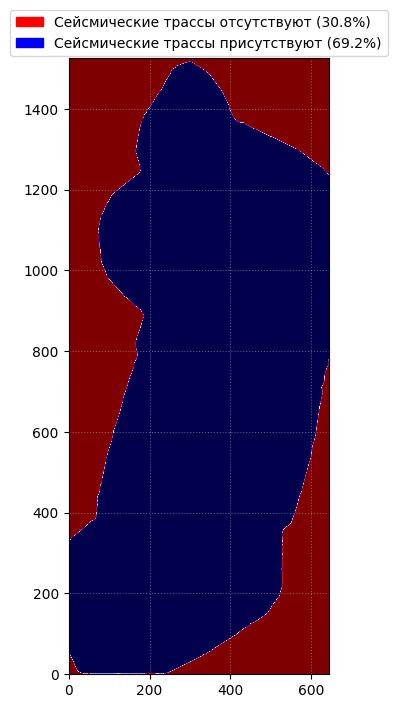


------------------------------------------------------------------------------------


{'result': False,
 'wrong_values': array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 'file_name': 'Глубинный куб NP cropped'}

In [12]:
seism_data_qa_qc.test_miss_traces()

Проверка физичности значений времени/глубины на сейсмическом кубе, проверяет на монотонное возрастание по всей оси.

In [13]:
seism_data_qa_qc.test_monotony()


     Тест пройден успешно.
     Отметки оси глубин/времени монотонно возрастают
------------------------------------------------------------------------------------


{'result': True,
 'wrong_values': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'file_name': 'Глубинный ку

Проверка корректности пикировки отражающего горизонта. 

Отражающий горизонт пересекает сейсмический куб в значениях амплитуд разного знака. Нет значительного преобладания амплитуд одного знака

ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!


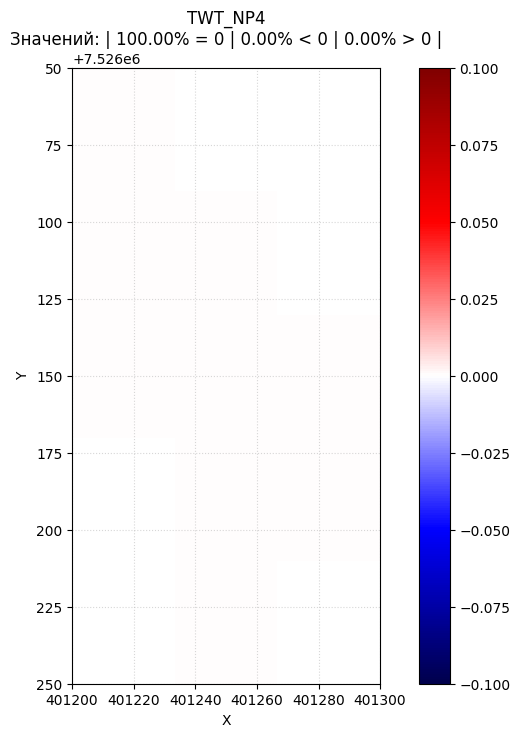


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!


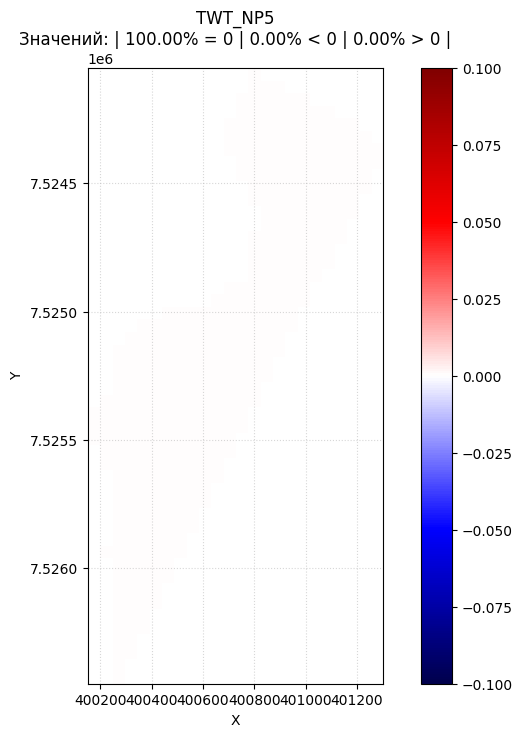


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TVD_TOP";отражающий горизонт NP4_TVD_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TWT_TOP";отражающий горизонт NP4_TWT_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------


{'data availability': True,
 'TWT_NP4': {'result': True,
  'slise_map':                X          Y         Dept  Value
  236459  401200.0  7526250.0  1659.377197    0.0
  236906  401200.0  7526200.0  1657.107910    0.0
  236907  401250.0  7526200.0  1675.273804    0.0
  237353  401200.0  7526150.0  1652.427856    0.0
  237354  401250.0  7526150.0  1673.473755    0.0
  237355  401300.0  7526150.0  1686.603760    0.0
  237801  401250.0  7526100.0  1665.953125    0.0
  237802  401300.0  7526100.0  1680.434082    0.0
  238248  401250.0  7526050.0  1652.099976    0.0},
 'TWT_NP5': {'result': True,
  'slise_map':                X          Y         Dept  Value
  234663  400800.0  7526450.0  1649.164307    0.0
  235110  400800.0  7526400.0  1649.514160    0.0
  235111  400850.0  7526400.0  1650.182861    0.0
  235112  400900.0  7526400.0  1650.831543    0.0
  235556  400750.0  7526350.0  1649.261475    0.0
  ...          ...        ...          ...    ...
  254768  400300.0  7524200.0  1650.

In [14]:
seism_data_qa_qc.test_surfaces_values_validation()

Проверка на пересечение поверхностей кровли и подошвы

In [15]:
seism_data_qa_qc.test_surfaces_dept_validation()


     Тест не пройден.
     Нижележащая структурная карта "TWT_NP5" оказалась выше вышележащей структурной карты "TWT_NP4" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Нижележащая структурная карта "NP4_TVD_TOP" оказалась ниже вышележащей структурной карты "TWT_NP5"
------------------------------------------------------------------------------------

     Тест не пройден.
     Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------


{'data availability': True,
 'TWT_NP4': {'result': False,
  'result report': 'Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)'},
 'TWT_NP5': {'result': False,
  'result report': 'Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)'},
 'NP4_TVD_TOP': {'result': False,
  'result report': 'Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)'},
 'files not found': []}

Формирование отчета в виде текстового файла

In [16]:
seism_data_qa_qc.generate_test_report(file_name='test_report_seismic')